Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [16]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/main/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    
# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Decision Trees

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or needs repair.

Dataset source: [DrivenData.org](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/).

## Directions

The tasks for this project are as follows:

- **Task 1:** Sign up for a [Kaggle](https://www.kaggle.com/) account.
- **Task 2:** Use `wrangle` function to import training and test data.
- **Task 3:** Split training data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build and train `model_dt`.
- **Task 7:** Calculate the training and validation accuracy score for your model.
- **Task 8:** Adjust model's `max_depth` to reduce overfitting.
- **Task 9 `stretch goal`:** Create a horizontal bar chart showing the 10 most important features for your model.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `sklearn`

# Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. **We recommend that you choose a username that's based on your name, since you might include it in your resume in the future.** Go to our Kaggle InClass competition website (the URL is in Slack). Go to the **Rules** page. Accept the rules of the competition. Notice that the **Rules** page also has instructions for the Submission process. The **Data** page has feature definitions.

# I. Wrangle Data

**Task 1:** Using the `wrangle` function above, read the `train_features.csv` and  `train_labels.csv` files into the DataFrame `df`. Next, use the same function to read the test set `test_features.csv` into the DataFrame `X_test`.

In [47]:
import pandas as pd
import numpy as np
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv', parse_dates = ['date_recorded'], na_values = [0, -2.000000e-08]), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')).set_index('id')
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
print(train.shape)
print(test.shape)
#print(test.nunique(), train.nunique())

(59399, 40)
(14358, 40)


In [48]:
def wrangle(X):
  # Drop constant columns
  X = X.copy()
  X.drop(columns=['recorded_by'], inplace=True)

    # Drop HCCCs
  cutoff = 100
  drop_cols = [col for col in X.select_dtypes('object').columns
                 if X[col].nunique() > cutoff]
  X.drop(columns=drop_cols, inplace=True)

    # Drop duplicate columns
  dupe_cols = [col for col in X.head(15).T.duplicated().index
                 if X.head(15).T.duplicated()[col]]
  X.drop(columns=dupe_cols, inplace=True)   

  # create year recorded features from datetime
  X['yr_recorded'] = X['date_recorded'].dt.year
  X.drop(columns = 'date_recorded', inplace=True)          

  return X

In [50]:
df = wrangle(train)
#X_test = wrangle(test)
print(df.shape)
print(X_test.shape)

(59399, 30)
(14358, 29)


In [ ]:
# get the number of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

In [ ]:
# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

In [ ]:
# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

In [ ]:
# Combine the lists 
features = numeric_features + categorical_features
print(features)

In [78]:
X_test.nunique()

id                       14358
amount_tsh                  67
gps_height                2142
longitude                13920
latitude                 13920
num_private                 36
basin                        9
region                      21
region_code                 26
district_code               20
population                 631
public_meeting               2
scheme_management           11
permit                       2
construction_year           55
extraction_type             17
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [51]:
target = 'status_group'
y = df[target]
X = df.drop(columns = target)

**Task 4:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [53]:
from sklearn.metrics import accuracy_score
baseline_acc = y_train.value_counts(normalize = True)
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: functional                 0.542583
non functional             0.384352
functional needs repair    0.073066
Name: status_group, dtype: float64


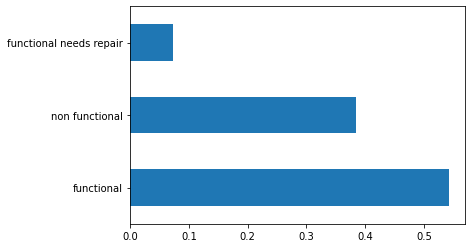

In [54]:
y_train.value_counts(normalize = True).plot(kind = 'barh')

# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_dt`, and fit it to your training data. Your `Pipeline` should include:

- an `OrdinalEncoder` transformer for categorical features.
- a `SimpleImputer` transformer fot missing values.
- a `DecisionTreeClassifier` predictor.

**Note:** Don't forget to set the `random_state` parameter for your `DecisionTreeClassifier`.

In [55]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [56]:
model_dt = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()  
)

model_dt.fit(X_train, y_train);

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoint_type_group...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                       

# V. Check Metrics

**Task 7:** Calculate the training and validation accuracy scores for `model_dt`.

In [62]:
training_acc = model_dt.score(X_train, y_train)
val_acc = model_dt.score(X_val, y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.9956859361518551
Validation Accuracy Score: 0.7502525252525253


# VI. Tune Model

**Task 8:** Is there a large difference between your training and validation accuracy? If so, experiment with different setting for `max_depth` in your `DecisionTreeClassifier` to reduce the amount of overfitting in your model.

In [127]:
# Use this cell to experiment and then change 
# your model hyperparameters in Task 6
model_dt2 = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy = 'mean'),
    DecisionTreeClassifier(min_samples_leaf = 20, random_state = 42)  
)

model_dt2.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [128]:
training_acc2 = model_dt2.score(X_train, y_train)
val_acc2 = model_dt2.score(X_val, y_val)

print('Training Accuracy Score:', training_acc2)
print('Validation Accuracy Score:', val_acc2)

Training Accuracy Score: 0.8093604663397799
Validation Accuracy Score: 0.7712121212121212


# VII. Communicate Results

**Task 9 `stretch goal`:** Create a horizontal barchart that shows the the 10 most important features for model_dt, sorted by value.

**Note:** [`DecisionTreeClassifier.feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreecla#sklearn.tree.DecisionTreeClassifier.feature_importances_) returns values that are different from [`LogisticRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). All the values will be positive, and they will sum to `1`.

In [129]:
#Get the feature importance of the decision tree model
#model = model_dt.named_steps['decisiontreeclassifier']
#feat_names = model_dt.named_steps['ordinalencoder'].get_feature_names()

encoder = model_dt2.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
pd.Series(model_dt2.feature_importances_, encoded_columns)

AttributeError: ignored

In [ ]:
#Make prediction for Kaggle project submission
y_pred = model_dt.predict(X_test)

In [ ]:
submission = pd.DataFrame(y_pred, columns = ['Status_group'], index = test.index)
submission.head()


In [ ]:
#download submission
submission.to_csv('odu_nkiru_sub.csv')